# Modelos de regrecion lineal
## Modelo con datos simulados
* y=a+b*x
* x: 100 valores distribuidos segun un
* N(1.5,2.5)
* Ye=5+1.9*x+e
* e estara distribuido segun una N(0,0.8)



In [1]:
import numpy as np
import pandas as pd


In [2]:
x=1.5+2.5*np.random.randn(100)


In [3]:
res=0+0.8*np.random.randn(100)

In [4]:
y_pred=5+1.9*x

In [5]:
y_act=5+1.9*x+res

In [6]:
x_list=x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_act.tolist()

In [7]:
data=pd.DataFrame(
 {
     "X":x_list,
     "y_actual":y_act_list,
     "y_prediccion":y_pred_list
 }
)

In [8]:
data.head()

,X,y_actual,y_prediccion
0,0.323938,5.517209,5.615483
1,-1.028567,4.898587,3.045722
2,2.393691,9.030158,9.548012
3,0.318834,6.570198,5.605784
4,1.589313,8.165173,8.019694


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean=[np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs prediccion')

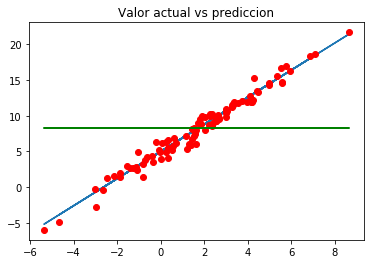

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.title("Valor actual vs prediccion")

In [12]:
#Suma cuadrados de la regresion
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
#suma de  los cuadrados de las diferencias 
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
#suma de  totales 
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [13]:
data.head()

,X,y_actual,y_prediccion,SSR,SSD,SST
0,0.323938,5.517209,5.615483,6.817099,0.009658,7.339935
1,-1.028567,4.898587,3.045722,26.839841,3.433109,11.074607
2,2.393691,9.030158,9.548012,1.746553,0.268173,0.645963
3,0.318834,6.570198,5.605784,6.867837,0.930094,2.743138
4,1.589313,8.165173,8.019694,0.042744,0.021164,0.003754


In [14]:
SSR=sum(data["SSR"])
SSD=sum(data["SSD"])
SST=sum(data["SST"])

In [15]:
SSR

2325.203262113152

In [16]:
SSD

69.59354283289015

In [17]:
SST

2449.3519471155455

In [18]:
SSR+SSD

2394.7968049460424

In [19]:
R2=SSR/SST

In [20]:
R2

0.9493136602322113

(array([ 2.,  2., 10.,  7., 23., 20., 14., 15.,  1.,  6.]),
 array([-2.16164631, -1.7411895 , -1.32073269, -0.90027588, -0.47981908,
        -0.05936227,  0.36109454,  0.78155135,  1.20200816,  1.62246497,
         2.04292178]),
 <a list of 10 Patch objects>)

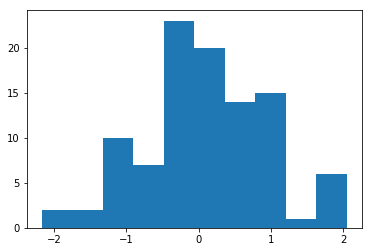

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

In [22]:
x_mean = np.mean(data["X"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.743641012231928, 8.226440051541987)

In [23]:
data["beta_n"] = (data["X"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["X"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(4.873579054633266, 1.922907853960678)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [27]:
data["y_model"] = alpha + beta * data["X"]

In [28]:
data.head()

,X,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.323938,5.517209,5.615483,6.817099,0.009658,7.339935,3.846303,2.015556,5.496482
1,-1.028567,4.898587,3.045722,26.839841,3.433109,11.074607,9.225503,7.685140,2.895739
2,2.393691,9.030158,9.548012,1.746553,0.268173,0.645963,0.522457,0.422565,9.476426
3,0.318834,6.570198,5.605784,6.867837,0.930094,2.743138,2.359826,2.030076,5.486667
4,1.589313,8.165173,8.019694,0.042744,0.021164,0.003754,0.009455,0.023817,7.929681


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(2380.844142341167, 68.50780477438579, 2449.351947115546)

In [31]:
R2 = SSR / SST
R2

0.9720302323824648

Text(0.5, 1.0, 'Valor Actual vs Predicción')

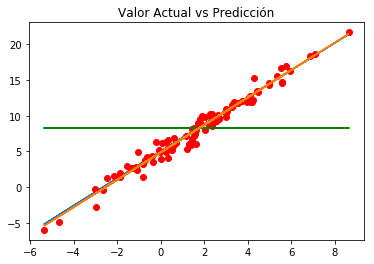

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["X"],data["y_prediccion"])
plt.plot(data["X"], data["y_actual"], "ro")
plt.plot(data["X"],y_mean, "g")
plt.plot(data["X"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8360976213288086

In [34]:
np.mean(data["y_actual"])

8.226440051541987

In [35]:
RSE / np.mean(data["y_actual"])

0.1016354116835858